In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=2500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [7]:
from citipy import citipy

In [8]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282] 
coordinates = zip(x, y)

In [9]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

palembang id
hilo us
bredasdorp za
rikitea pf
hualmay pe
sorland no
ilulissat gl
kapaa us
hithadhoo mv
port alfred za
matara lk
eureka us
marovoay mg
port alfred za
nikolskoye ru
ushuaia ar
hermanus za
matameye ne
ushuaia ar
kiunga pg
tisul ru
bluff nz
tasiilaq gl
ushuaia ar
tsihombe mg
guerrero negro mx
lorengau pg
rikitea pf
temaraia ki
cherskiy ru
tabou ci
ushuaia ar
mangit uz
kodiak us
puerto ayora ec
katsuura jp
ahuimanu us
rikitea pf
cintalapa mx
grand river south east mu
samusu ws
cherskiy ru
rikitea pf
chumikan ru
hilo us
yellowknife ca
awjilah ly
hobart au
port blair in
chuy uy
rikitea pf
askiz ru
atar mr
punakha bt
key largo us
viraganur in
omboue ga
taolanaro mg
bud no
mughal sarai in
cape town za
barrow us
hermanus za
kalmunai lk
mataura pf
lagoa pt
atuona pf
puerto ayora ec
marawi sd
sarab ir
kahului us
butaritari ki
atuona pf
olafsvik is
paradwip in
san quintin mx
busselton au
carnarvon au
namatanai pg
bonfim br
dalnegorsk ru
hilo us
navalmoral de la mata es
ponta do sol 

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

914

In [13]:
import requests
requests.__version__

'2.25.1'

In [14]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [15]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [18]:
# Create an empty list to hold the weather data.
# Create an empty list to hold the weather data.
cityy_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop Through the List of Cities and Build the City URL

  
    
    
# Note: Unfortunately, this will cause programming errors when we are building the city_url
# because it adds the index, not the city name, to the city_url So use
# Instead of using two for loops, we can use the enumerate() method as an alternative
# way to iterate through the list of cities and retrieve both the index, and the city from the list.

from config import weather_api_key

# Loop through all the cities in the list.


for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    #city_url = url + "&q=" + city.replace(" ","+")
    city_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=" + city.replace(" ","+")
    

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Next, we will retrieve the data from the JSON weather response for each city.
   
# Handle API Request Errors with try-except Blocks

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        weather_description = city_weather["weather"][0]["description"]
        
        try:
            lightrain_inches = city_weather["lightrain"]["24h"]
        except:
            lightrain_inches = ("0")
            pass
        try:
            clear_sky = city_weather["clearsky"]["24h"]
        except:
            clear_sky = ("0")  
            pass
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        cityy_data.append({"City": city.title(),
                          "Country": city_country,
                          "Date": city_date,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Current Description": weather_description,
                          "LightRain inches (last 24 hours)": lightrain_inches,
                          "ClearSky inches (last 24 hours)": clear_sky})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | palembang
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | hualmay
Processing Record 6 of Set 1 | sorland
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | matara
Processing Record 12 of Set 1 | eureka
Processing Record 13 of Set 1 | marovoay
Processing Record 14 of Set 1 | nikolskoye
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | matameye
City not found. Skipping...
Processing Record 18 of Set 1 | kiunga
Processing Record 19 of Set 1 | tisul
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | tasiilaq
Processing Record 22 of Set 1 | tsihombe
City not found. Skipping...
Proc

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
cityy_data_df = pd.DataFrame(cityy_data)
cityy_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description,LightRain inches (last 24 hours),ClearSky inches (last 24 hours)
0,Palembang,ID,2021-09-16 16:48:17,-2.9167,104.7458,75.27,89,41,3.40,scattered clouds,0,0
1,Hilo,US,2021-09-16 16:48:18,19.7297,-155.0900,76.28,89,90,9.22,overcast clouds,0,0
2,Bredasdorp,ZA,2021-09-16 16:48:18,-34.5322,20.0403,56.52,58,90,6.91,overcast clouds,0,0
3,Rikitea,PF,2021-09-16 16:48:19,-23.1203,-134.9692,73.17,77,7,14.70,light rain,0,0
4,Hualmay,PE,2021-09-16 16:48:19,-11.0964,-77.6139,66.47,69,33,9.62,scattered clouds,0,0
5,Sorland,NO,2021-09-16 16:48:19,67.6670,12.6934,51.66,71,99,7.05,overcast clouds,0,0
6,Ilulissat,GL,2021-09-16 16:48:20,69.2167,-51.1000,28.42,46,1,9.22,clear sky,0,0
7,Kapaa,US,2021-09-16 16:43:37,22.0752,-159.3190,77.32,80,75,13.80,broken clouds,0,0
8,Hithadhoo,MV,2021-09-16 16:48:21,-0.6000,73.0833,83.91,70,100,9.78,overcast clouds,0,0
9,Port Alfred,ZA,2021-09-16 16:48:21,-33.5906,26.8910,59.02,67,69,20.24,broken clouds,0,0


In [29]:
# Create the output file (CSV).
output_data_file = "weather_database/WeatherPy_database.csv"
# Export the City_Data into a CSV.
cityy_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = cityy_data_df["Lat"]
max_temps = cityy_data_df["Max Temp"]
humidity = cityy_data_df["Humidity"]
cloudiness = cityy_data_df["Cloudiness"]
wind_speed = cityy_data_df["Wind Speed"]

In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'09/16/21'

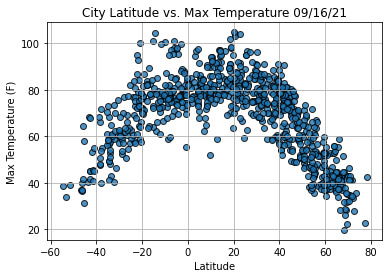

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_database/Fig1.png")

# Show plot.
plt.show()

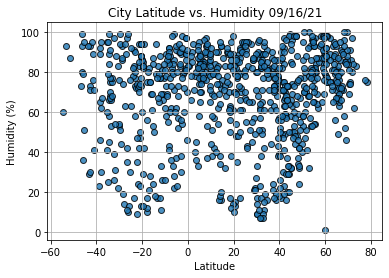

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_database/Fig2.png")
# Show plot.
plt.show()

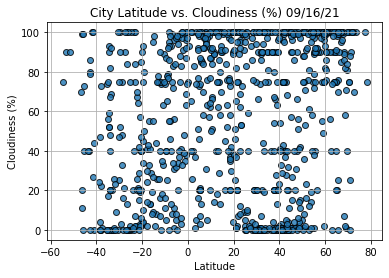

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_database/Fig3.png")
# Show plot.
plt.show()

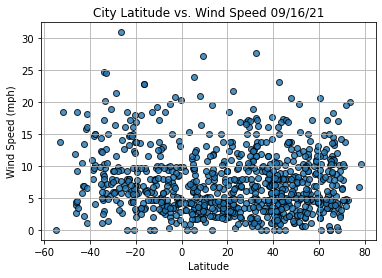

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_database/Fig4.png")
# Show plot.
plt.show()